In [1]:
import pandas as pd
import numpy as np
import glob, os

from seahorse import Graph, SContainer
from seahorse import constants, sns
constants.SHOWMODE = True

cpal = ["#90ee90", "#6495ed", "#ca472f", "#f6c85f", "#6f4e7c", "#ffa056", "#558254", "#4ad9e1"]
cdef = "#9dbcd4"

cpalLib = cpal[:3]
cpalQual = [cpal[5], cpal[3], cpal[4]]

import matplotlib as mpl
mpl.rcParams['svg.fonttype'] = 'none' # Output SVG with text as text, not curves
mpl.rcParams['savefig.transparent'] = True # Save w/ transparent background by default

In [2]:
def save_replace_excel(fname, df, sheetname):
    with pd.ExcelWriter(fname, mode='a') as writer:  
        workBook = writer.book
        try:
            workBook.remove(workBook[sheetname])
        except:
            print("worksheet doesn't exist")
        finally:
            df.to_excel(writer, sheet_name=sheetname, index=False)
    
excelpath = '../../../nr-source-data.xlsx'
save_replace_excel_spmp = lambda df, sheetname: save_replace_excel(excelpath, df, sheetname)

## Supplementary Figure 8.B

In [3]:
fname = '../tables/strains_mapping.tsv'
df = pd.read_csv(fname, sep='\t', index_col=0)
df['prc'] = df['count'] * 100 / df['readcount']
df.head()

,sample,group,count,readcount,prc
0,MHH353,SPMP,14351270,17279633,83.053095
1,MHH264,SPMP,14093219,16066095,87.720252
2,MHH621,SPMP,14421610,18701009,77.116748
3,MHH343,SPMP,19490810,23290179,83.686819
4,MHH366,SPMP,18004770,20599699,87.403073


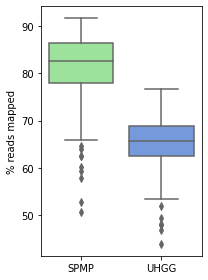

In [4]:
graph = Graph(df)
graph.sns.boxplot(x='group', y='prc', palette=cpal)
graph.ax.set_xlabel('')
graph.ax.set_ylabel('% reads mapped')

graph.set_size_inches(3, 4)
graph.tight_layout()
graph.save('../img/sf8.B.svg')

In [5]:
save_replace_excel_spmp(df, 'SFig 8.B')